# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:
Alejandro Barriga Saavedra
Identificación:
1014266729
---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [ ]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

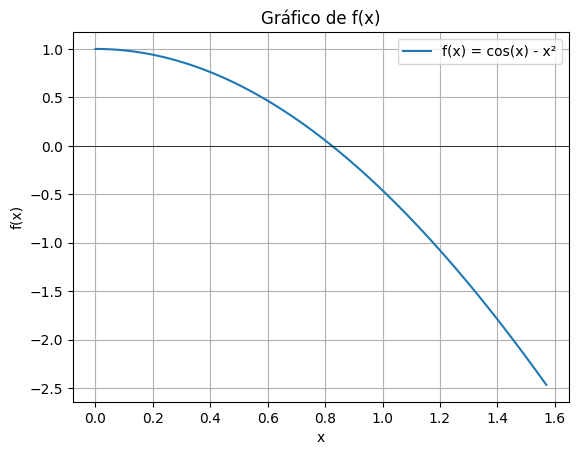

Primera aproximación a la raíz desde DataFrame: 0.7933314781792408


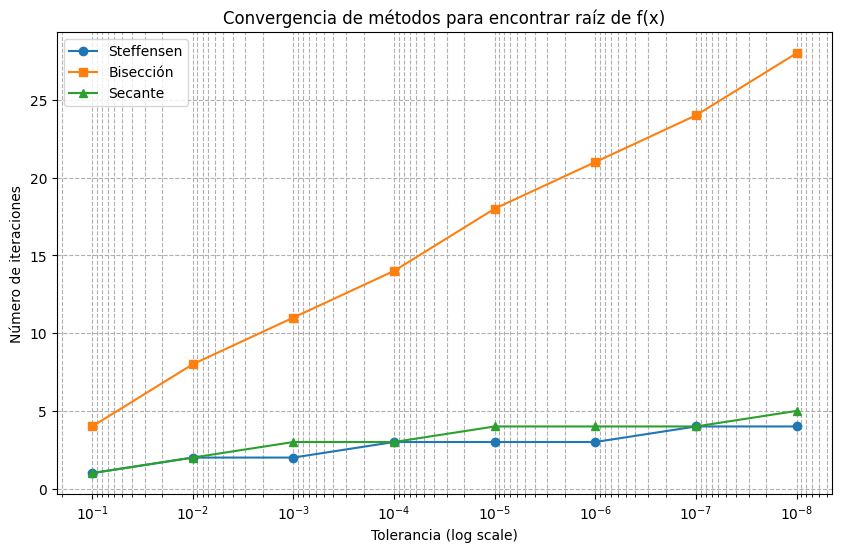

In [2]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import root_scalar, newton, bisect
# Definir la función cuya raíz se busca
def f(x):
    return np.cos(x) - x**2
# Método de Steffensen
def steffensen(f, x0, tol=1e-6, max_iter=100):
    """
    Método de Steffensen para encontrar raíces de f(x) = 0.
    Retorna la raíz y número de iteraciones.
    """
    x_n = x0
    for i in range(max_iter):
        y_n = x_n + f(x_n)
        f_y_n = f(y_n)
        f_x_n = f(x_n)
        if f_y_n == f_x_n:
            # Evitar división por cero
            return None, i
        x_next = x_n - (f_x_n ** 2) / (f_y_n - f_x_n)
        if abs(x_next - x_n) < tol:
            return x_next, i + 1
        x_n = x_next
    return x_n, max_iter

# Graficar la función
x_vals = np.linspace(0, np.pi/2, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = cos(x) - x²')
plt.axhline(0, color='black', lw=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de f(x)')
plt.legend()
plt.grid()
plt.show()
# Crear DataFrame y encontrar primera aproximación a la raíz
df = pd.DataFrame({'x': x_vals, 'f(x)': y_vals})
cercanos_a_cero = df[np.abs(df['f(x)']) < 0.1]
x0_aprox = cercanos_a_cero['x'].iloc[0]
print(f"Primera aproximación a la raíz desde DataFrame: {x0_aprox}")
# Definir tolerancias para la comparación
tolerancias = np.logspace(-1, -8, 8)
# Inicializar listas para almacenar iteraciones
iter_steff = []
iter_bisec = []
iter_sec = []
  # Ejecutar métodos para cada tolerancia
for tol in tolerancias:
    # Steffensen
    root_s, it_s = steffensen(f, x0_aprox, tol=tol, max_iter=1000)
    iter_steff.append(it_s if it_s is not None else 1000)
    # Bisección con root_scalar
    sol_bisec = root_scalar(f, bracket=[0, np.pi/2], method='bisect', xtol=tol, maxiter=1000)
    iter_bisec.append(sol_bisec.iterations if sol_bisec.converged else 1000)
    # Secante con root_scalar
    sol_sec = root_scalar(f, x0=x0_aprox, x1=x0_aprox + 0.1, method='secant', xtol=tol, maxiter=1000)
    iter_sec.append(sol_sec.iterations if sol_sec.converged else 1000)
# Graficar iteraciones vs tolerancia
plt.figure(figsize=(10,6))
plt.plot(tolerancias, iter_steff, 'o-', label='Steffensen')
plt.plot(tolerancias, iter_bisec, 's-', label='Bisección')
plt.plot(tolerancias, iter_sec, '^-', label='Secante')
plt.xscale('log')
plt.gca().invert_xaxis()  # Mejor visualización: tolerancia pequeña a la derecha
plt.xlabel('Tolerancia (log scale)')
plt.ylabel('Número de iteraciones')
plt.title('Convergencia de métodos para encontrar raíz de f(x)')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





θ0=90°: T10 = 248855.664169 s, T3 = 2.549485 s, Error aprox. (3 términos vs 10) = 99.9990%
θ0=15°: T10 = 2.206990 s, T3 = 2.206986 s, Error aprox. (3 términos vs 10) = 0.0002%



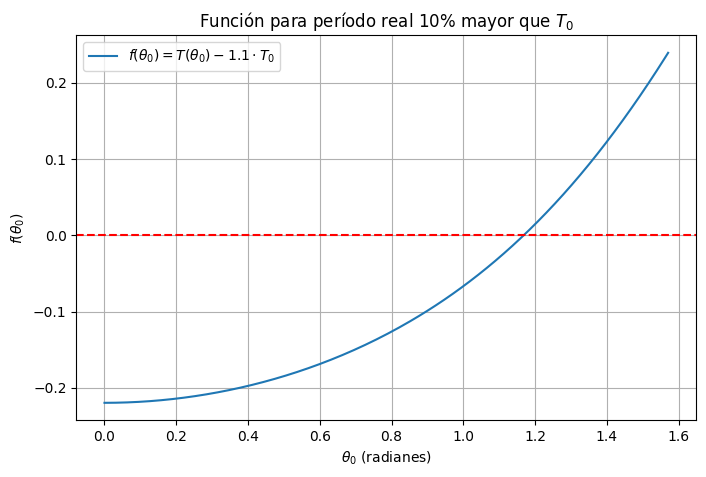

f(0) = -0.219754
f(π/2) = 0.239497
Raíz encontrada por bisección: θ0 = 1.168137 rad = 66.93°
Raíz encontrada por Newton (secante): θ0 = 1.168137 rad = 66.93°


In [5]:
# Aqui va su código
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect, newton
# ========= Parte A =========
def doble_factorial(n):
    """
    Calcula el doble factorial (2n-1)!!, producto de todos los impares desde 1 hasta (2n-1)
    """
    if n == 0:
        return 1
    result = 1
    for i in range(1, 2*n, 2):
        result *= i
    return result

def coeficiente_cn(n):
    """
    Calcula el coeficiente cn según la fórmula:
    cn = [ (2n-1)!! / (2^n * n) ]^2
    Considera n=0 definido como 1 según uso en la serie.
    """
    if n == 0:
        return 1  # c0 = 1 para la fórmula general
    return (doble_factorial(n) / (2**n * n))**2

def periodo(L, g, theta0, terms=10):
    """
    Calcula el periodo T del péndulo simple usando la serie truncada a 'terms'.
    Devuelve el periodo real T y la aproximación para oscilaciones pequeñas T0.
    """
    T0 = 2 * np.pi * np.sqrt(L / g)  # Aproximación para pequeñas oscilaciones
    series_sum = sum(coeficiente_cn(n) * (np.sin(theta0 / 2))**(2*n) for n in range(1, terms))  # Desde n=1 para evitar sumar c0 dos veces
    T = T0 * (1 + series_sum)
    return T, T0

# Parámetros físicos
L = 1.2   # metros
g = 9.81  # m/s²

# Ángulos específicos en radianes
theta0_90 = np.radians(90)
theta0_15 = np.radians(15)
# Calcular periodo real y aproximación para ambas amplitudes con 10 términos
T_90, T0_90 = periodo(L, g, theta0_90, terms=10)
T_15, T0_15 = periodo(L, g, theta0_15, terms=10)
# Calcular error relativo tomando la suma de 10 términos como "exacto"
# Para evaluar error de aproximaciones usando 3 términos
T_90_3, _ = periodo(L, g, theta0_90, terms=3)
T_15_3, _ = periodo(L, g, theta0_15, terms=3)
error_90_3 = abs(T_90 - T_90_3) / T_90 * 100
error_15_3 = abs(T_15 - T_15_3) / T_15 * 100
print(f"θ0=90°: T10 = {T_90:.6f} s, T3 = {T_90_3:.6f} s, Error aprox. (3 términos vs 10) = {error_90_3:.4f}%")
print(f"θ0=15°: T10 = {T_15:.6f} s, T3 = {T_15_3:.6f} s, Error aprox. (3 términos vs 10) = {error_15_3:.4f}%\n")

# ========= Parte B =========
def f(theta0):
    """
    Función para encontrar θ0 donde el periodo real T(θ0) es un 10% mayor que T0.
    Se usan los primeros 4 términos de la serie.
    """
    T, T0 = periodo(L, g, theta0, terms=4)
    return T - 1.1 * T0
# Graficar función f(θ0) para θ0 ∈ [0, π/2]
theta_vals = np.linspace(0, np.pi/2, 200)
f_vals = np.array([f(theta) for theta in theta_vals])

plt.figure(figsize=(8,5))
plt.plot(theta_vals, f_vals, label=r'$f(\theta_0) = T(\theta_0) - 1.1 \cdot T_0$')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel(r'$\theta_0$ (radianes)')
plt.ylabel(r'$f(\theta_0)$')
plt.title('Función para período real 10% mayor que $T_0$')
plt.grid(True)
plt.legend()
plt.show()
# Buscar raíz numéricamente
a = 0
b = np.pi/2
fa = f(a)
fb = f(b)

print(f"f(0) = {fa:.6f}")
print(f"f(π/2) = {fb:.6f}")
if fa * fb < 0:
    root_bisect = bisect(f, a, b)
    print(f"Raíz encontrada por bisección: θ0 = {root_bisect:.6f} rad = {np.degrees(root_bisect):.2f}°")
else:
    print("No hay cambio de signo en el intervalo para aplicar bisección.")
try:
    root_newton = newton(f, x0=0.5, x1=1.0)
    print(f"Raíz encontrada por Newton (secante): θ0 = {root_newton:.6f} rad = {np.degrees(root_newton):.2f}°")
except RuntimeError as e:
    print(f"Newton no convergió: {e}")
